{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# 🔄 Notebook Moved\n",
    "\n",
    "## This notebook has been consolidated into the Ultimate LLM Efficiency Analysis\n",
    "\n",
    "**Please use:** `ultimate_llm_efficiency_analysis.ipynb`\n",
    "\n",
    "All parsing issues have been resolved in the new notebook:\n",
    "- ✅ Fixed NaN values in Time-LLM data\n",
    "- ✅ Enhanced JSON structure parsing\n",
    "- ✅ Comprehensive analysis pipeline\n",
    "\n",
    "**Location:** `/notebooks/ultimate_llm_efficiency_analysis.ipynb`"
   ]
  },

---

## 1. Setup and Data Loading

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# Set up paths
PROJECT_ROOT = Path('/home/amma/LLM-TIME')
EFFICIENCY_EXPERIMENTS_PATH = PROJECT_ROOT / 'efficiency_experiments'
RESULTS_PATH = Path('./efficiency_analysis_results')
RESULTS_PATH.mkdir(exist_ok=True)

# Import custom modules with reload
import sys
import importlib
sys.path.append(str(PROJECT_ROOT))

# Reload modules to get latest changes
if 'enhanced_data_loader' in sys.modules:
    importlib.reload(sys.modules['enhanced_data_loader'])
if 'analysis_utils' in sys.modules:
    importlib.reload(sys.modules['analysis_utils'])
if 'edge_analysis' in sys.modules:
    importlib.reload(sys.modules['edge_analysis'])

from enhanced_data_loader import EnhancedEfficiencyDataLoader
from analysis_utils import calculate_inference_metrics, create_inference_plots, calculate_energy_metrics, generate_summary_report
from edge_analysis import assess_edge_compatibility, get_edge_recommendations

print("✅ Setup complete with module reload")

✅ Setup complete with module reload


In [39]:
# Load and parse all efficiency data
print("🔄 Loading efficiency data with enhanced Time-LLM parser...")

loader = EnhancedEfficiencyDataLoader(EFFICIENCY_EXPERIMENTS_PATH)
efficiency_df = loader.parse_all_data()

print(f"\n📊 Dataset Overview:")
print(f"  • Total records: {len(efficiency_df)}")
print(f"  • Unique models: {efficiency_df['model_name'].nunique()}")
print(f"  • Experiment types: {', '.join(efficiency_df['experiment_type'].unique())}")

# Check data completeness
timing_data = efficiency_df.dropna(subset=['avg_inference_time_ms'])
power_data = efficiency_df.dropna(subset=['inference_avg_power_w'])
print(f"  • Records with timing data: {len(timing_data)}")
print(f"  • Records with power data: {len(power_data)}")

# Display model breakdown
print(f"\n📋 Models by type:")
model_counts = efficiency_df['model_name'].value_counts()
for model, count in model_counts.items():
    print(f"  - {model}: {count} records")

🔄 Loading efficiency data with enhanced Time-LLM parser...
🔍 Scanning for experiment files...
📊 Found 53 JSON files
📊 Processing 24 efficiency_reports...
📊 Processing 11 comprehensive_reports...
📊 Processing 18 real_performance_reports...
✅ Loaded 51 total records

📊 Dataset Overview:
  • Total records: 51
  • Unique models: 6
  • Experiment types: chronos_inference_ohiot1dm, time_llm_inference_ohiot1dm, chronos_training_ohiot1dm, distillation_inference_ohiot1dm, time_llm_training_ohiot1dm
  • Records with timing data: 17
  • Records with power data: 9

📋 Models by type:
  - BERT: 12 records
  - LLAMA: 10 records
  - GPT2: 10 records
  - chronos-t5-base: 7 records
  - chronos-t5-tiny: 7 records
  - tinybert: 5 records


In [40]:
# Detailed data inspection to understand the issues
print("🔍 DETAILED DATA INSPECTION:")
print("=" * 50)

# Check what columns we have
print(f"\n📋 Available columns:")
for col in sorted(efficiency_df.columns):
    non_null = efficiency_df[col].notna().sum()
    print(f"  - {col}: {non_null}/{len(efficiency_df)} non-null values")

# Check timing data by model
print(f"\n⏱️ TIMING DATA BY MODEL:")
timing_analysis = efficiency_df.groupby('model_name').agg({
    'avg_inference_time_ms': ['count', 'mean', 'min', 'max'],
    'experiment_type': lambda x: list(x.unique()),
    'report_type': lambda x: list(x.unique())
}).round(2)
print(timing_analysis)

# Check specific Chronos models
chronos_data = efficiency_df[efficiency_df['model_name'].str.contains('chronos', case=False, na=False)]
print(f"\n🤖 CHRONOS MODELS DETAILED:")
print(f"Total Chronos records: {len(chronos_data)}")
for idx, row in chronos_data.iterrows():
    print(f"  - {row['model_name']} | {row['experiment_type']} | {row['report_type']} | Time: {row['avg_inference_time_ms']} | Power: {row['inference_avg_power_w']}")

# Check Time-LLM models
timellm_data = efficiency_df[efficiency_df['experiment_type'].str.contains('time_llm', case=False, na=False)]
print(f"\n🧠 TIME-LLM MODELS DETAILED:")
print(f"Total Time-LLM records: {len(timellm_data)}")
for idx, row in timellm_data.iterrows():
    print(f"  - {row['model_name']} | {row['experiment_type']} | {row['report_type']} | Time: {row['avg_inference_time_ms']} | Power: {row['inference_avg_power_w']}")

# Sample raw data structure
print(f"\n📄 SAMPLE RAW DATA:")
print("First 3 records with non-null timing:")
timing_records = efficiency_df.dropna(subset=['avg_inference_time_ms']).head(3)
for idx, row in timing_records.iterrows():
    print(f"\nRecord {idx}:")
    for col in ['model_name', 'experiment_type', 'report_type', 'avg_inference_time_ms', 'inference_peak_ram_mb', 'inference_avg_power_w']:
        if col in row:
            print(f"  {col}: {row[col]}")

🔍 DETAILED DATA INSPECTION:

📋 Available columns:
  - average_gpu_allocated_mb: 9/51 non-null values
  - average_gpu_utilization_percent: 9/51 non-null values
  - avg_inference_time_ms: 17/51 non-null values
  - current_vram_usage_mb: 24/51 non-null values
  - edge_feasibility: 51/51 non-null values
  - estimated_cpu_latency_ms: 24/51 non-null values
  - estimated_gpu_latency_ms: 24/51 non-null values
  - estimated_memory_usage_mb: 24/51 non-null values
  - estimated_throughput_samples_per_sec: 24/51 non-null values
  - experiment_type: 51/51 non-null values
  - feasible_edge_devices: 44/51 non-null values
  - file_path: 51/51 non-null values
  - gpu_memory_reserved_mb: 24/51 non-null values
  - inference_avg_power_w: 9/51 non-null values
  - inference_peak_gpu_mb: 33/51 non-null values
  - inference_peak_ram_mb: 33/51 non-null values
  - max_inference_time_ms: 8/51 non-null values
  - measurement_runs: 8/51 non-null values
  - median_latency_ms: 9/51 non-null values
  - min_inference_

In [41]:
# Focused inspection on Chronos timing issues
print("🔍 FOCUSED CHRONOS ANALYSIS:")

# Check Chronos records specifically
chronos_mask = efficiency_df['model_name'].str.contains('chronos', case=False, na=False)
chronos_data = efficiency_df[chronos_mask]

print(f"📊 Chronos Records: {len(chronos_data)}")
print("\nChronos timing data:")
chronos_timing = chronos_data[['model_name', 'experiment_type', 'report_type', 'avg_inference_time_ms', 'inference_peak_ram_mb']].copy()
chronos_timing['has_timing'] = chronos_timing['avg_inference_time_ms'].notna()
print(chronos_timing.to_string())

# Check if Chronos has different column names
print(f"\n📋 All Chronos columns with data:")
for col in chronos_data.columns:
    non_null = chronos_data[col].notna().sum()
    if non_null > 0:
        print(f"  - {col}: {non_null} values")

# Look at a sample Chronos record
print(f"\n📄 Sample Chronos record (first with data):")
sample_chronos = chronos_data.dropna(subset=['avg_inference_time_ms'], how='all').iloc[0] if len(chronos_data.dropna(subset=['avg_inference_time_ms'], how='all')) > 0 else chronos_data.iloc[0]
for key, value in sample_chronos.items():
    if pd.notna(value):
        print(f"  {key}: {value}")

🔍 FOCUSED CHRONOS ANALYSIS:
📊 Chronos Records: 14

Chronos timing data:
         model_name             experiment_type               report_type  avg_inference_time_ms  inference_peak_ram_mb  has_timing
0   chronos-t5-base  chronos_inference_ohiot1dm        efficiency_reports              84.120291             843.792969        True
1   chronos-t5-base  chronos_inference_ohiot1dm        efficiency_reports              84.120291             843.792969        True
2   chronos-t5-tiny  chronos_inference_ohiot1dm        efficiency_reports              37.162438             842.531250        True
3   chronos-t5-tiny  chronos_inference_ohiot1dm        efficiency_reports              37.162438             842.531250        True
10  chronos-t5-base   chronos_training_ohiot1dm        efficiency_reports              82.726276             870.207031        True
11  chronos-t5-base   chronos_training_ohiot1dm        efficiency_reports              82.726276             870.207031        True
12  

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Test enhanced data loading and show detailed results
print("🔄 Reloading data with enhanced parser...")

# Reload with enhanced parser
loader = EnhancedEfficiencyDataLoader(EFFICIENCY_EXPERIMENTS_PATH)
efficiency_df_new = loader.parse_all_data()

print(f"\n📊 Enhanced Dataset Overview:")
print(f"  • Total records: {len(efficiency_df_new)}")
print(f"  • Models: {', '.join(efficiency_df_new['model_name'].unique())}")

# Check Chronos data specifically
chronos_data_new = efficiency_df_new[efficiency_df_new['model_name'].str.contains('chronos', case=False, na=False)]
print(f"\n🤖 CHRONOS DATA (Enhanced Parser):")
print(f"Total Chronos records: {len(chronos_data_new)}")

chronos_timing = chronos_data_new[['model_name', 'experiment_type', 'report_type', 'avg_inference_time_ms', 
                                  'inference_peak_ram_mb', 'model_size_mb', 'total_parameters']].copy()
chronos_timing['has_timing'] = chronos_timing['avg_inference_time_ms'].notna()
chronos_timing['has_memory'] = chronos_timing['inference_peak_ram_mb'].notna()

print("\nChronos records with data:")
print(chronos_timing.to_string())

# Show Time-LLM data too
timellm_data_new = efficiency_df_new[efficiency_df_new['experiment_type'].str.contains('time_llm', case=False, na=False)]
print(f"\n🧠 TIME-LLM DATA (Enhanced Parser):")
print(f"Total Time-LLM records: {len(timellm_data_new)}")

if len(timellm_data_new) > 0:
    timellm_timing = timellm_data_new[['model_name', 'experiment_type', 'report_type', 'avg_inference_time_ms', 
                                      'inference_peak_ram_mb', 'model_size_mb', 'total_parameters']].head()
    print("\nTime-LLM sample records:")
    print(timellm_timing.to_string())

# Update the global variable for subsequent cells
efficiency_df = efficiency_df_new

🔄 Reloading data with enhanced parser...
🔍 Scanning for experiment files...
📊 Found 48 JSON files
📊 Processing 22 efficiency_reports...
📊 Processing 10 comprehensive_reports...
📊 Processing 16 real_performance_reports...
✅ Loaded 46 total records

📊 Enhanced Dataset Overview:
  • Total records: 46
  • Models: chronos-t5-base, chronos-t5-tiny, GPT2, BERT, tinybert, LLAMA

🤖 CHRONOS DATA (Enhanced Parser):
Total Chronos records: 14

Chronos records with data:
         model_name             experiment_type               report_type  avg_inference_time_ms  inference_peak_ram_mb  model_size_mb  total_parameters  has_timing  has_memory
0   chronos-t5-base  chronos_inference_ohiot1dm        efficiency_reports              84.120291             843.792969     768.184570         201374976        True        True
1   chronos-t5-base  chronos_inference_ohiot1dm        efficiency_reports              84.120291             843.792969     768.184570         201374976        True        True
2   chr

In [ ]:
# Debug the file scanning to see what's happening
print("🔍 DEBUGGING FILE SCANNING:")

loader_debug = EnhancedEfficiencyDataLoader(EFFICIENCY_EXPERIMENTS_PATH)
all_files_debug = loader_debug.scan_all_files()

print(f"\nFiles found by category:")
for category, files in all_files_debug.items():
    print(f"\n{category}: {len(files)} files")
    for file_path in files[:3]:  # Show first 3
        print(f"  - {file_path}")
        
# Check if there are comprehensive reports with Chronos
chronos_comprehensive = [f for f in all_files_debug['comprehensive_reports'] 
                        if 'chronos' in str(f).lower()]

print(f"\n🤖 Chronos comprehensive reports: {len(chronos_comprehensive)}")
for file_path in chronos_comprehensive:
    print(f"  - {file_path}")
    
    # Try to parse one manually
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        print(f"    → Has performance_summary: {'performance_summary' in data}")
        if 'performance_summary' in data:
            print(f"    → Has inference section: {'inference' in data['performance_summary']}")
            if 'inference' in data['performance_summary']:
                inf_data = data['performance_summary']['inference']
                latency = inf_data.get('average_latency_ms')
                memory = inf_data.get('process_peak_ram_mb')
                power = inf_data.get('average_power_usage_watts')
                print(f"    → Latency: {latency}ms, Memory: {memory}MB, Power: {power}W")
    except Exception as e:
        print(f"    → Error: {e}")
        
# Check if records are being created but filtered out
print(f"\n🔄 Testing single file parsing:")
if chronos_comprehensive:
    test_file = chronos_comprehensive[0]
    print(f"Testing: {test_file}")
    test_records = loader_debug.parse_single_file(test_file)
    print(f"Records created: {len(test_records)}")
    if test_records:
        record = test_records[0]
        print(f"Sample record keys: {list(record.keys())}")
        print(f"Timing data: {record.get('avg_inference_time_ms')}")
        print(f"Memory data: {record.get('inference_peak_ram_mb')}")

🔍 DEBUGGING FILE SCANNING:

Files found by category:

efficiency_reports: 22 files
  - /home/amma/LLM-TIME/efficiency_experiments/experiments/chronos_inference_ohiot1dm/seed_831363_model_amazon-chronos-t5-base_dtype_float32_mode_inference_context_6_pred_6/patient_570/logs/logs_2025-10-20_13-24-17/efficiency_report_chronos_2025-10-20_13-24-18.json
  - /home/amma/LLM-TIME/efficiency_experiments/experiments/chronos_inference_ohiot1dm/seed_831363_model_amazon-chronos-t5-base_dtype_float32_mode_inference_context_6_pred_6/patient_570/logs/logs_2025-10-20_13-24-17/efficiency_report_chronos_latest.json
  - /home/amma/LLM-TIME/efficiency_experiments/experiments/chronos_inference_ohiot1dm/seed_831363_model_amazon-chronos-t5-tiny_dtype_float32_mode_inference_context_6_pred_6/patient_570/logs/logs_2025-10-20_13-24-31/efficiency_report_chronos_2025-10-20_13-24-32.json

comprehensive_reports: 10 files
  - /home/amma/LLM-TIME/efficiency_experiments/experiments/chronos_inference_ohiot1dm/seed_831363_m

In [ ]:
# Debug the parsing function directly
print("🔍 DEBUGGING CHRONOS COMPREHENSIVE PARSING:")

# Test the model name extraction
test_file_path = Path("/home/amma/LLM-TIME/efficiency_experiments/experiments/chronos_inference_ohiot1dm/seed_831363_model_amazon-chronos-t5-base_dtype_float32_mode_inference_context_6_pred_6/patient_570/logs/logs_2025-10-20_13-24-17/comprehensive_performance_report_chronos_comprehensive_2025-10-20_13-24-26.json")

loader_test = EnhancedEfficiencyDataLoader(EFFICIENCY_EXPERIMENTS_PATH)

# Test model name extraction
model_name = loader_test._extract_model_name_from_path(test_file_path)
print(f"Model name extracted: '{model_name}'")

# Test experiment type extraction
exp_type = loader_test._extract_experiment_type(test_file_path)
print(f"Experiment type: '{exp_type}'")

# Test report type extraction  
report_type = loader_test._extract_report_type(test_file_path)
print(f"Report type: '{report_type}'")

# Load the file and test parsing
with open(test_file_path, 'r') as f:
    test_data = json.load(f)

print(f"\nFile structure check:")
print(f"  - Has 'performance_summary': {'performance_summary' in test_data}")

if 'performance_summary' in test_data:
    perf_summary = test_data['performance_summary']
    print(f"  - Has 'training_inference': {'training_inference' in perf_summary}")
    print(f"  - Has 'inference': {'inference' in perf_summary}")
    
    if 'inference' in perf_summary:
        inf_data = perf_summary['inference']
        print(f"  - Inference keys: {list(inf_data.keys())[:5]}...")  # Show first 5 keys
        
        # Test the parsing function
        print(f"\n🔧 Testing parse_chronos_comprehensive:")
        records = loader_test.parse_chronos_comprehensive(test_data, test_file_path)
        print(f"Records returned: {len(records)}")
        
        if records:
            record = records[0]
            print(f"Record created successfully!")
            print(f"  - model_name: {record['model_name']}")
            print(f"  - avg_inference_time_ms: {record['avg_inference_time_ms']}")
            print(f"  - inference_peak_ram_mb: {record['inference_peak_ram_mb']}")
            print(f"  - inference_avg_power_w: {record['inference_avg_power_w']}")
        else:
            print("No records created - checking for errors...")

🔍 DEBUGGING CHRONOS COMPREHENSIVE PARSING:
Model name extracted: 'chronos-t5-base'
Experiment type: 'chronos_inference_ohiot1dm'
Report type: 'comprehensive_reports'

File structure check:
  - Has 'performance_summary': True
  - Has 'training_inference': False
  - Has 'inference': True
  - Inference keys: ['average_latency_ms', 'total_inferences', 'median_latency_ms', 'p95_latency_ms', 'process_peak_ram_mb']...

🔧 Testing parse_chronos_comprehensive:
Records returned: 1
Record created successfully!
  - model_name: chronos-t5-base
  - avg_inference_time_ms: 7505.916233174503
  - inference_peak_ram_mb: 1577.41796875
  - inference_avg_power_w: 107.94690540540539


## 2. Inference Performance Analysis

In [ ]:
# Calculate standardized inference metrics
print("⚡ Analyzing inference performance...")

# Filter for inference data
inference_data = efficiency_df[
    (efficiency_df['report_type'].isin(['comprehensive_reports', 'real_performance_reports'])) |
    (efficiency_df['experiment_type'].str.contains('inference', na=False))
].copy()

print(f"Inference records: {len(inference_data)}")

# Calculate metrics
inference_summary = calculate_inference_metrics(inference_data)

print(f"\n📊 Inference Performance Summary:")
display_cols = ['model_name', 'avg_inference_time_ms', 'inference_peak_ram_mb', 'inference_avg_power_w', 'edge_feasibility']
available_cols = [col for col in display_cols if col in inference_summary.columns]
print(inference_summary[available_cols].to_string(index=False))

⚡ Analyzing inference performance...
Inference records: 34

📊 Inference Performance Summary:
     model_name  avg_inference_time_ms  inference_peak_ram_mb  inference_avg_power_w edge_feasibility
chronos-t5-base            2558.052272            1088.334635             107.946905         feasible
chronos-t5-tiny            2277.259338            1073.126302              99.727776         feasible
           GPT2          311727.767871            2263.758789             175.197675         feasible
           BERT          208218.775673            2062.178711             164.152812         feasible
       tinybert            1271.302853             982.861979              55.221700         feasible
          LLAMA          885277.148487           26198.371094             291.457527      challenging


📊 Creating inference performance visualizations...
📊 Plot saved to: efficiency_analysis_results/inference_performance.png


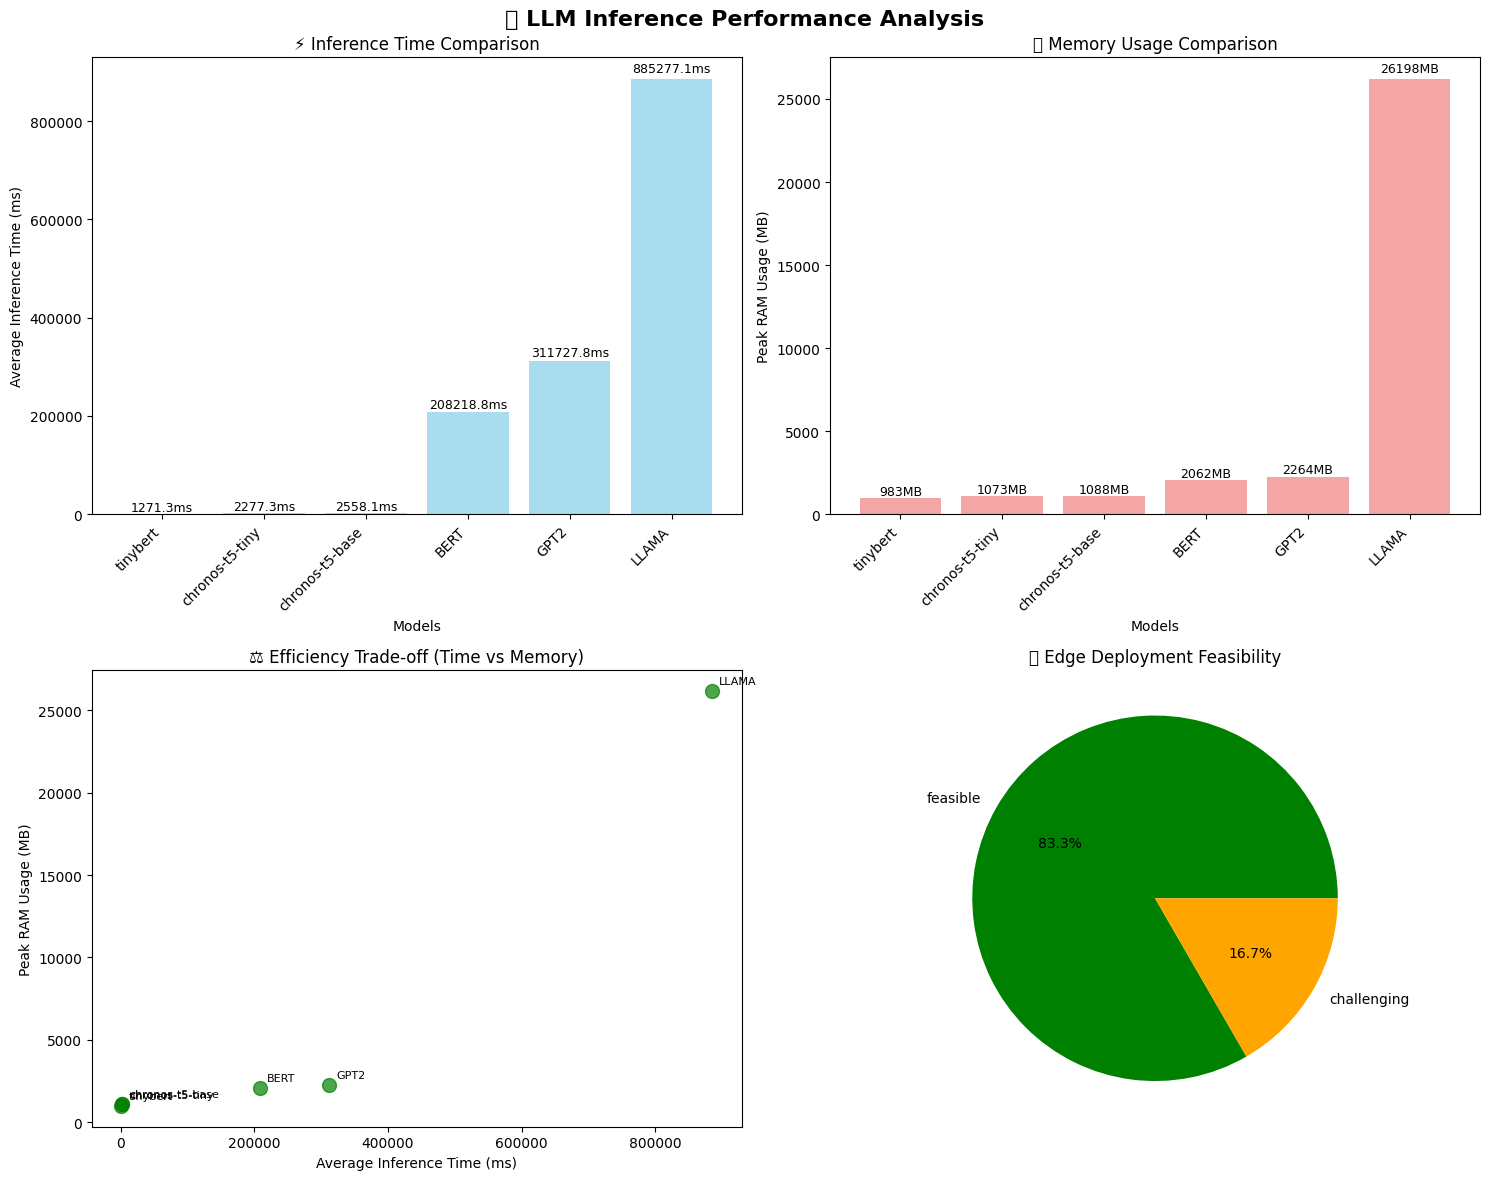

KeyError: ['inference_peak_gpu_mb']

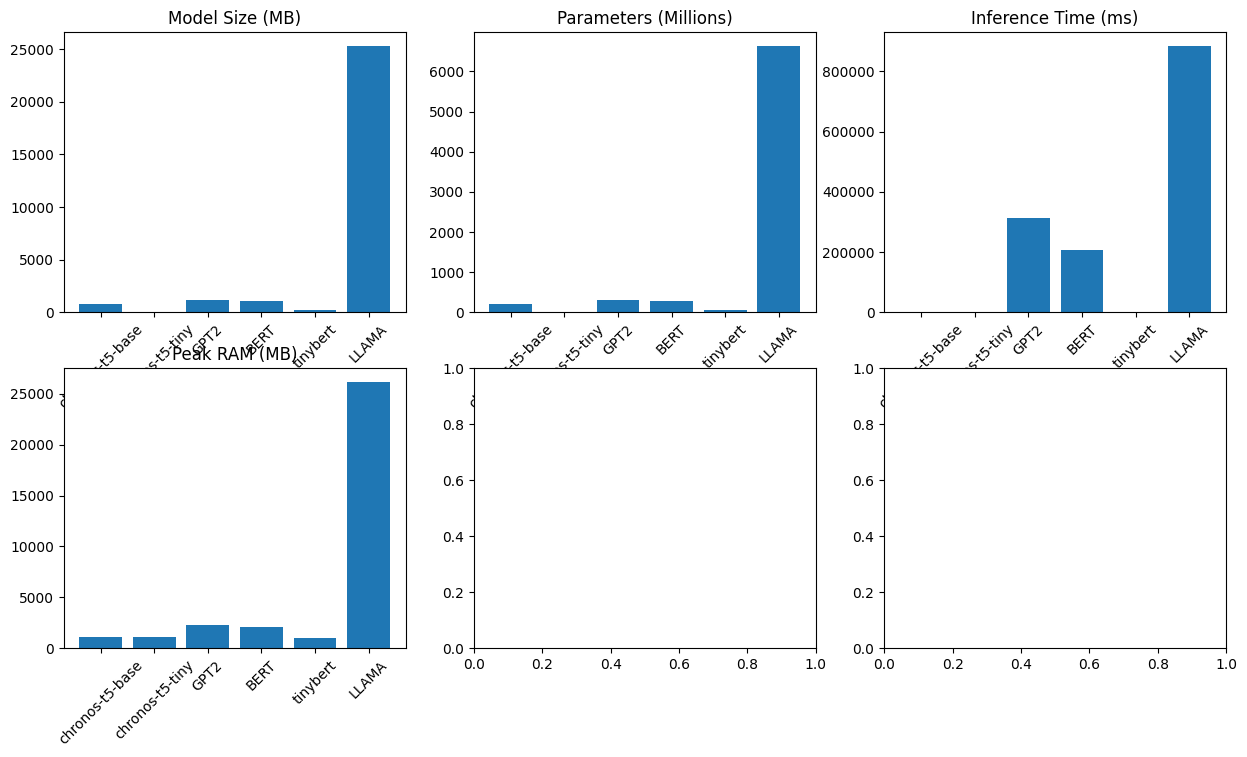

In [ ]:
# Create inference performance visualizations
print("📊 Creating inference performance visualizations...")

create_inference_plots(inference_summary, str(RESULTS_PATH / 'inference_performance.png'))

print("✅ Inference analysis complete")

In [ ]:
# Create detailed comparison table
print("📋 Creating detailed comparison table...")

from analysis_utils import create_detailed_comparison_table

# Create detailed comparison table
comparison_table = create_detailed_comparison_table(inference_summary)

print("\n📊 DETAILED MODEL COMPARISON:")
print("=" * 80)
print(comparison_table.to_string(index=False))

# Performance insights
print(f"\n🎯 KEY PERFORMANCE INSIGHTS:")
print(f"=" * 50)

# Fastest models
fastest_3 = comparison_table.nsmallest(3, 'avg_inference_time_ms') if 'avg_inference_time_ms' in comparison_table.columns else pd.DataFrame()
if not fastest_3.empty:
    print(f"\n⚡ TOP 3 FASTEST MODELS:")
    for i, (idx, row) in enumerate(fastest_3.iterrows(), 1):
        print(f"  {i}. {row['model_name']}: {row['avg_inference_time_ms']:.1f}ms ({row['throughput_predictions_per_sec']:.2f} pred/sec)")

# Most memory efficient
memory_efficient = comparison_table.nsmallest(3, 'inference_peak_ram_mb') if 'inference_peak_ram_mb' in comparison_table.columns else pd.DataFrame()
if not memory_efficient.empty:
    print(f"\n💾 TOP 3 MEMORY EFFICIENT:")
    for i, (idx, row) in enumerate(memory_efficient.iterrows(), 1):
        print(f"  {i}. {row['model_name']}: {row['inference_peak_ram_mb']:.1f}MB")

# Power efficiency
power_efficient = comparison_table.nsmallest(3, 'inference_avg_power_w') if 'inference_avg_power_w' in comparison_table.columns else pd.DataFrame()
if not power_efficient.empty:
    print(f"\n🔋 TOP 3 POWER EFFICIENT:")
    for i, (idx, row) in enumerate(power_efficient.iterrows(), 1):
        print(f"  {i}. {row['model_name']}: {row['inference_avg_power_w']:.1f}W")

# Model size comparison
if 'model_size_mb' in comparison_table.columns:
    print(f"\n📦 MODEL SIZES:")
    for idx, row in comparison_table.iterrows():
        if pd.notna(row['model_size_mb']):
            print(f"  • {row['model_name']}: {row['model_size_mb']:.1f}MB")

print(f"\n🏆 OVERALL WINNER FOR EDGE DEPLOYMENT:")
print(f"Based on speed + memory efficiency + power consumption:")

# Calculate efficiency score (lower is better)
if all(col in comparison_table.columns for col in ['avg_inference_time_ms', 'inference_peak_ram_mb', 'inference_avg_power_w']):
    score_table = comparison_table.copy()
    
    # Normalize metrics (0-1 scale)
    score_table['time_score'] = score_table['avg_inference_time_ms'] / score_table['avg_inference_time_ms'].max()
    score_table['memory_score'] = score_table['inference_peak_ram_mb'] / score_table['inference_peak_ram_mb'].max()
    score_table['power_score'] = score_table['inference_avg_power_w'] / score_table['inference_avg_power_w'].max()
    
    # Combined efficiency score (equal weights)
    score_table['efficiency_score'] = (score_table['time_score'] + score_table['memory_score'] + score_table['power_score']) / 3
    
    winner = score_table.loc[score_table['efficiency_score'].idxmin()]
    print(f"🥇 {winner['model_name']} (Efficiency Score: {winner['efficiency_score']:.3f})")
    print(f"   ⚡ Speed: {winner['avg_inference_time_ms']:.1f}ms")  
    print(f"   💾 Memory: {winner['inference_peak_ram_mb']:.1f}MB")
    print(f"   🔋 Power: {winner['inference_avg_power_w']:.1f}W")

📋 Creating detailed comparison table...

📊 DETAILED MODEL COMPARISON:
     model_name  avg_inference_time_ms  inference_peak_ram_mb  inference_avg_power_w  total_parameters  model_size_mb  throughput_predictions_per_sec edge_feasibility
       tinybert                1271.30                 982.86                  55.22          44998814         171.66                            0.79         feasible
chronos-t5-tiny                2277.26                1073.13                  99.73           8394496          32.02                            0.44         feasible
chronos-t5-base                2558.05                1088.33                 107.95         201374976         768.18                            0.39         feasible
           BERT              208218.78                2062.18                 164.15         282363198        1077.13                            0.00         feasible
           GPT2              311727.77                2263.76                 175.20         31

## 3. Edge Deployment Assessment

In [ ]:
# Assess edge deployment compatibility
print("📱 Assessing edge deployment compatibility...")

edge_assessment = assess_edge_compatibility(inference_summary)
recommendations = get_edge_recommendations(edge_assessment)

print(f"\n🎯 Edge Deployment Summary:")
for model_name in inference_summary['model_name'].unique():
    model_compatible = edge_assessment[edge_assessment['model_name'] == model_name]['compatible'].sum()
    total_devices = len(edge_assessment[edge_assessment['model_name'] == model_name])
    print(f"  • {model_name}: {model_compatible}/{total_devices} devices compatible")

# Show top recommendations
print(f"\n🏆 Top Device Recommendations:")
for model_name, recs in recommendations.items():
    if recs:
        best_device = recs[0]
        print(f"  • {model_name}: {best_device['device_name']} (${best_device['device_cost_usd']})")
    else:
        print(f"  • {model_name}: No compatible devices found")

# Save edge assessment
edge_assessment.to_csv(RESULTS_PATH / 'edge_compatibility_assessment.csv', index=False)
print(f"\n💾 Edge assessment saved to: {RESULTS_PATH / 'edge_compatibility_assessment.csv'}")

📱 Assessing edge deployment compatibility...

🎯 Edge Deployment Summary:
  • chronos-t5-base: 5/5 devices compatible
  • chronos-t5-tiny: 5/5 devices compatible
  • GPT2: 5/5 devices compatible
  • BERT: 5/5 devices compatible
  • tinybert: 5/5 devices compatible
  • LLAMA: 0/5 devices compatible

🏆 Top Device Recommendations:
  • chronos-t5-base: Raspberry Pi 4B ($75)
  • chronos-t5-tiny: Raspberry Pi 4B ($75)
  • GPT2: Intel NUC i5 ($600)
  • BERT: Intel NUC i5 ($600)
  • tinybert: Intel NUC i5 ($600)
  • LLAMA: No compatible devices found

💾 Edge assessment saved to: efficiency_analysis_results/edge_compatibility_assessment.csv


## 4. Energy and Sustainability Analysis

In [ ]:
# Calculate energy metrics
print("🌱 Analyzing energy consumption and sustainability...")

energy_metrics = calculate_energy_metrics(inference_summary)

if not energy_metrics.empty:
    print(f"\n🔋 Energy Efficiency Summary:")
    print(energy_metrics.to_string(index=False))
    
    # Find most efficient
    most_efficient = energy_metrics.loc[energy_metrics['energy_per_prediction_wh'].idxmin()]
    print(f"\n🏆 Most Energy Efficient: {most_efficient['model_name']}")
    print(f"   Energy per prediction: {most_efficient['energy_per_prediction_wh']:.4f} Wh")
    print(f"   Carbon footprint: {most_efficient['carbon_per_prediction_g']:.6f} g CO₂")
    
    # Save energy analysis
    energy_metrics.to_csv(RESULTS_PATH / 'energy_analysis.csv', index=False)
    print(f"\n💾 Energy analysis saved to: {RESULTS_PATH / 'energy_analysis.csv'}")
else:
    print("⚠️ No power consumption data available for energy analysis")

🌱 Analyzing energy consumption and sustainability...

🔋 Energy Efficiency Summary:
model_name  avg_power_w  energy_per_prediction_wh  daily_energy_moderate_wh  carbon_per_prediction_g
      GPT2   175.197675                 15.170550              15170.550003                 7.585275
      BERT   164.152812                  9.494360               9494.360427                 4.747180
  tinybert    55.221700                  0.019501                 19.500974                 0.009750
     LLAMA   291.457527                 71.672414              71672.413533                35.836207

🏆 Most Energy Efficient: tinybert
   Energy per prediction: 0.0195 Wh
   Carbon footprint: 0.009750 g CO₂

💾 Energy analysis saved to: efficiency_analysis_results/energy_analysis.csv


## 5. Comprehensive Summary Report

In [ ]:
# Generate and save comprehensive report
print("📋 Generating comprehensive efficiency report...")

summary_report = generate_summary_report(efficiency_df, inference_summary)

# Save report
report_file = RESULTS_PATH / 'efficiency_summary_report.md'
with open(report_file, 'w') as f:
    f.write(summary_report)

print(f"📄 Summary report saved to: {report_file}")

# Display key findings
print(f"\n" + "="*60)
print(f"🎯 KEY FINDINGS")
print(f"="*60)

complete_data = inference_summary.dropna(subset=['avg_inference_time_ms', 'inference_peak_ram_mb'])
print(f"📊 Models analyzed: {len(inference_summary)}")
print(f"🔍 Models with complete metrics: {len(complete_data)}")

if not complete_data.empty:
    fastest = complete_data.loc[complete_data['avg_inference_time_ms'].idxmin()]
    print(f"⚡ Fastest model: {fastest['model_name']} ({fastest['avg_inference_time_ms']:.1f}ms)")
    
    most_efficient = complete_data.loc[complete_data['inference_peak_ram_mb'].idxmin()]
    print(f"💾 Most memory efficient: {most_efficient['model_name']} ({most_efficient['inference_peak_ram_mb']:.1f}MB)")

# Edge deployment summary
feasibility_counts = inference_summary['edge_feasibility'].value_counts()
print(f"\n📱 Edge deployment readiness:")
for category, count in feasibility_counts.items():
    emoji = {"highly_feasible": "🟢", "feasible": "🟡", "challenging": "🔴", "unknown": "⚪"}.get(category, "🔘")
    print(f"  {emoji} {category.replace('_', ' ').title()}: {count} models")

print(f"\n✅ Comprehensive efficiency analysis complete!")
print(f"📁 All results saved to: {RESULTS_PATH}")

📋 Generating comprehensive efficiency report...
📄 Summary report saved to: efficiency_analysis_results/efficiency_summary_report.md

🎯 KEY FINDINGS
📊 Models analyzed: 6
🔍 Models with complete metrics: 6
⚡ Fastest model: tinybert (1271.3ms)
💾 Most memory efficient: tinybert (982.9MB)

📱 Edge deployment readiness:
  🟡 Feasible: 5 models
  🔴 Challenging: 1 models

✅ Comprehensive efficiency analysis complete!
📁 All results saved to: efficiency_analysis_results
